In [1]:
import numpy as np
import time

# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Abschlussprojekt: Chaos Probleme 
---
*Wir haben uns dazu entschlossen, die Dokumentation in das SageMath Skript einzubinden. Daher finden Sie hier eine ausführliche Erklärung des Problems, des Skriptes, der Ergebnisse und der Arbeitsaufteilung.*

# Chaos Probleme
---

Die Chaosforschung / Chaostheorie ist unter anderem ein Teilgebiet der angewandten Mathematik.

Sie beschäftigt sich im Wesentlichen mit der zeitlichen Entwicklung in speziellen dynamischen Systemen, die in den meisten Fällen unvorhersagbar erscheint. Eine solches Verhalten wird als Chaos bezeichnet, sobald die Entwicklung empfindlich von der Anfangsbedingung abhängt, d.h. ein System bei dem man die Startbedinung nur leicht abändert und das dann zu einem komplett unterschiedlichen Ergebnis führt ist Teil der Chaos Problem.

# Mandelbrot Mengen
---

*Inhalt folgt*

# Apfelmänchen & Selbstähnlichkeit
---

*Inhalt folgt*

# Julia Mengen
---
**Erstellt von: Simon Gärtner**

## Einführung
---

### Was sind Julia Mengen?

Die Julia Mengen wurden nach dem französischen Mathematiker Gaston Julia benannt, der im Jahr 1919 die Folge der Gleichung $z_{n+1}=z_n^2 + i$ für komplexe Zahlen untersuchte. Insbesondere betrachtete er, welche Zahlen der komplexen Ebenen nach mehrfachem Anwenden dieser Gleichung gegen $\pm \infty$ konvergieren. Je nachdem, wie schnell die Zahlen gegen unendlich streben, färbte er sie in unterschiedliche Farben. Hieraus sind die Grafiken über Julia Mengen entstanden.

Hierfür verallgemeinerte er die Formel zu $z_{n+1}=z_n^2 + c$. Die verschiedenen Variablen haben folgende Bedeutung:
- $z_{n+1}$ Wert, der auf $z_n$ folgt
- $c$ komplexe Zahl, die frei gewählt werden darf
- Startwert $z_0$: Koordinate aus der komplexen Ebene

Interessant ist hier zu beobachten, dass für jedes $c$ eine andere Julia Menge entsteht, selbst wenn die Änderung an $c$ noch so klein ist.

Hier sind Bilder verschiedener Julia-Mengen für unterschiedliche komplexe Konstanten c. In dieser Grafik ist sehr schön erkenntlich, dass trotz nur sehr kleiner Änderungen an der Konstante, komplett unterschiedliche Grafiken entstehen und sich somit das Verhalten der Folge stark verändert. 

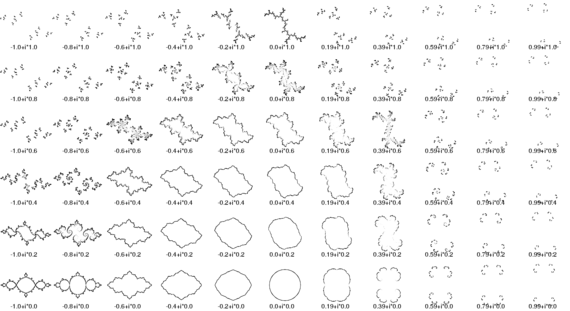

*Quelle: https://de.wikipedia.org/wiki/Julia-Menge, abgerufen am 09.06.2023 um 15.47 Uhr*

### Parameter für Julia Mengen:

Zu Beginn der Erstellung müssen folgende Parameter festgelegt werden:
1. Konstante c: wird bei jeder Funktion auf die Potenz von $z_n$ aufaddiert
2. Formel: Julia Mengen verwenden folgende Iterationsvorschrift: $z_{n+1}=z_n^2+c$
3. x-start und x-end: Größe des Bildes auf der x-Achse
4. y-start und y-end: Größe des Bildes auf der y-Achse
5. scaling: Auflösung des Bildes, z.B. bei 10 wird ein 1x1 Feld in insgesamt 100 Pixel aufgeteilt
6. obere bzw. untere  Grenze: Ab diesem Wert gilt das Ergebnis als "unendlich"
7. Grenze für Iterationen: Ab wie vielen Recheniterationen wird die Folge abgebrochen

### Erstellung von Julia Mengen Grafiken:

Für die Erstellung einer Julia Grafik wird wie folgt vorgegangen:
1. Matrix in der gewünschten Bildgröße und Auflösung erstellen
2. Matrix mit Koordinaten der komplexen Ebenen initialisieren
3. Globales Verhalten für jede Koordinate bestimmen

    1. Koordinate in die Iterationsvorschrift einsetzen
    
    2. Ergebnis wieder einsetzen, solange die maximale Anzahl an Auswertungen bzw. die obere Wertegrenze, für die die Zahl nicht als beschränkt gilt, erreicht ist
    
    3. Anzahl der erreichten Durchgänge zurückgeben und in die Matrix schreiben
    
4. Komplett neu berechnete Matrix als Plot mit einer Farbskala ausgeben


### Performance:

Aufgrund der vielen Hintergrundberechnungen mit aufwendigen Operationen spielt die Performance bei der Erstellung von Julia Mengen eine entscheidende Rolle.

Bei einer Bildgröße von 4 x 4 (-2 bis 2 auf x und y Achse), einer Auflösung von 100 Pixel pro Quadrat, bei einer oberen bzw. unteren Wertegrenze von -100 und 100 und bei insgesamt pro Rechnung 200 Durchgängen ergeben sich im schlimmsten Fall folgende Anzahlen an Multiplikationen und Additionen. Im schlimmsten Fall sind alle Punkte der komplexen Ebene beschränkt, d.h. sie konvergieren bei mehrfachen Ausführen der Gleichung nicht gegen unendlich.

- Pro Auswertung der Folge: 1 Multiplikation ($z^2$) und eine Addition ($+c$).
- Pro Pixel bei 200 Auswertungen der Formel: 200 Multiplikationen und 200 Additionen
- Pro Quadrat (1x1) hat man 100 Pixel: 20.000 Multiplikationen und 20.000 Additionen
- Pro Bild (4x4) hat man: 80.000 Multiplikationen und 80.000 Additionen

Hinzukommen noch Zeiten für das Lesen und Schreiben aus bzw. in der Matrix. 

Für diese Menge an Auswertungen und Berechnungen erhält man allerdings nur ein Bild in einer sehr schlechten Auflösung (Scaling = 10):

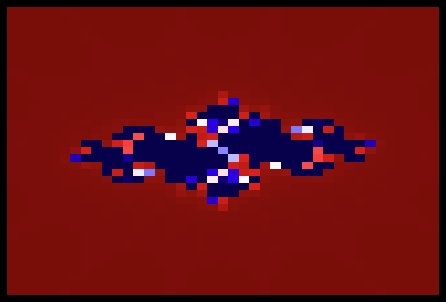 

Grafik mit Scaling = 50:

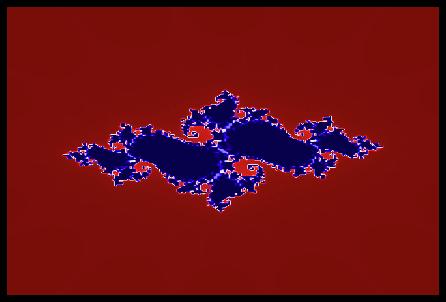

Scaling = 1.000:

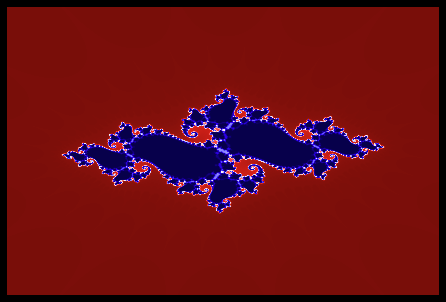


In dieser Arbeit möchte ich versuchen, die Performance für die Erstellung von Julia Mengen zu vergleichen. Von Bedeutung wird vor allem die Auflösung und die Art der Implementierung. Aus diesem Grund habe ich drei verschiedene Implementierungsarten aufgestellt:
- Implementierung in SageMath mit SageMath-Befehlen (sage-kernel): siehe Implementierung unten
- Implementierung in Python (python-kernel): siehe Implementierung im zweiten Notebook (JuliaMengenPythonKernel)
- Implementierung in Python mit C-Compiler (ebenfalls python-kernel): siehe Implementierung im zweiten Notebook (JuliaMengenPythonKernel)

#### C-Compiler für Python: 

Für die Performanceverbesserung in Python wurde eine Plug-In mit dem Namen "Numba" verwendet. (Link zur Webseite: https://numba.pydata.org/). Hierbei handelt es sich um einen Just-In-Time Compiler, der mathematische Operationen erst nach C, C++ oder Fortan übersetzt, da diese dort viel schneller berechnet werden können.

## Implementierung in SageMath & Analyse der Ergebnisse
---

Definierung von globalen Variablen, die für die Performance-Analyse und die Formeln benötigt werden.

In [2]:
# Define variables
x, c = var('x', 'c')

# analytics class to define class variables for multiplications and additions
class Analytics:
    multiplications = 0
    additions = 0

Methode zum Initialisieren der Parameter, die für Julia Mengen benötigt werden. Hierfür werden alle Parameter an die Methode übergeben und anschließend in einem Dictionary zurückgegeben.

In [3]:
def initialize_julia_sets(constant_c, formula, x_start, x_end, y_start, y_end, scaling):
    """
    Initializes the parameters for generating Julia sets.

    Args:
        constant_c (complex): The constant value used in the Julia set formula.
        formula (str): The formula used for generating the Julia set.
        x_start (float): The starting value for the x-axis range.
        x_end (float): The ending value for the x-axis range.
        y_start (float): The starting value for the y-axis range.
        y_end (float): The ending value for the y-axis range.
        scaling (int): The scaling factor of picture.

    Returns:
        dict: A dictionary containing the initialized parameters for generating Julia sets.
            - 'constant_c': The constant value used in the Julia set formula.
            - 'formula': The formula used for generating the Julia set.
            - 'x_start': The starting value for the x-axis range.
            - 'x_end': The ending value for the x-axis range.
            - 'y_start': The starting value for the y-axis range.
            - 'y_end': The ending value for the y-axis range.
            - 'scaling': The scaling factor of picture.
    """
    return {
        'constant_c': constant_c,
        'formula': formula,
        'x_start': x_start,
        'x_end': x_end,
        'y_start': y_start,
        'y_end': y_end,
        'scaling': scaling
    }

Diese Methode berechnet die Funktionswerte der Iterationsvorschrift. Hierfür werden die festgelegte Konstante `c` und der vorherige Wert (`x`) der Funktion übergeben. Die Funktion selber ist in `func` gespeichert.

In [4]:
def get_function_value(func, x, c):
    """
    Calculates the function value by calling the provided function with the given arguments.

    Args:
        func (callable): The function to be called.
        x: The first argument to be passed to the function.
        c: The second argument to be passed to the function.

    Returns:
        The value obtained by calling the function with the provided arguments.
    """
    Analytics.multiplications += 1
    Analytics.additions += 1
    
    return func(x, c)

Die folgende Methode erstellt die Matrix und initialisiert diese mit den entsprechenen Koordinaten der komplexen Ebenen. Diese bilden dann den Startwert $z_0$ für die Iterationsvorschrift.

In [20]:
def initialize_matrix(setup):
    """
    Initializes a matrix using the provided setup parameters.

    Args:
        setup (dict): A dictionary containing the setup parameters for matrix initialization.

    Returns:
        Matrix: The initialized matrix.

    """
    matrix_list = []

    for col in np.arange(setup['x_start'], setup['x_end'] + 1, 1 / setup['scaling']):
        col_list = []

        for row in np.arange(setup['y_start'], setup['y_end'] + 1, 1 / setup['scaling']):
            col_list.append(row + (col * -1) * 1j)
        matrix_list.append(col_list)

    return Matrix(CDF, matrix_list)

Folgende Methode `print_matrix(matrix)` plottet die übergebene Matrix inkl. der Farbskala.

In [6]:
def print_matrix(matrix):
    """
    Prints a visual representation of the matrix.

    Args:
        matrix: The matrix to be plotted.

    Returns:
        The visual representation of the matrix.

    """
    return matrix_plot(matrix, cmap='seismic', colorbar=True, axes=False, frame=True)

Die Methode `validate_point(func, complex_number, setup)` überprüft, ob die Folge für einen gewissen Startpunkt beschränkt ist oder nicht. Ebenfalls gibt sie auch zurück, wie schnell die Folge gegen unendlich geht, und bestimmt somit die Einfärbung des Pixels im Plot.

In [7]:
def validate_point(func, complex_number, setup):
    """
    Validates a complex number using a function and a setup dictionary.

    Args:
        func (callable): The function used to calculate the next value of the complex number.
        complex_number (complex): The initial complex number to be validated.
        setup (dict): A dictionary containing the setup parameters.

    Returns:
        int: The number of iterations until the complex number exceeded the validation bounds or the maximum number of iterations reached.

    """
    run = 200

    while complex_number > -100 and run > 0 and complex_number < 100:
        complex_number = get_function_value(func, complex_number, setup['constant_c'])
        run -= 1

    return run

Folgende Methode geht einmal durch alle Pixel des Bildes durch und bestimmt mit Hilfe anderer Methoden, wie schnell sich die Folge gegen unendlich bewegt. Diese Ergebnisse werden dann auch in die Matrix geschrieben.

In [23]:
def change_matrix(func, matrix, setup):
    """
    Changes the values in the matrix based on the given function and setup parameters.

    Args:
        func (callable): The function used to validate each complex number in the matrix.
        matrix: The matrix to be modified.
        setup (dict): A dictionary containing the setup parameters.

    Returns:
        Matrix: The modified matrix.

    """
    new_list = []

    for row in range((setup['y_end'] - setup['y_start']) * setup['scaling'] + 1):
        rows = []

        for col in range((setup['x_end'] - setup['x_start']) * setup['scaling'] + 1):
            rows.append(validate_point(func, matrix[row][col], setup))

        new_list.append(rows)

    return Matrix(CDF, new_list)

#### Main Programm

Folgender Codeblock stellt die Hauptroutine des Programms dar. Von hier aus wird der Programmfluss gesteuert und durch Timer analysiert.

Initialize setup...
Initialize done: 0.0 seconds!
Initialize Matrix...
Initialize done: 0.19 seconds!
Calculating....
Calculation done: 23.8 seconds!


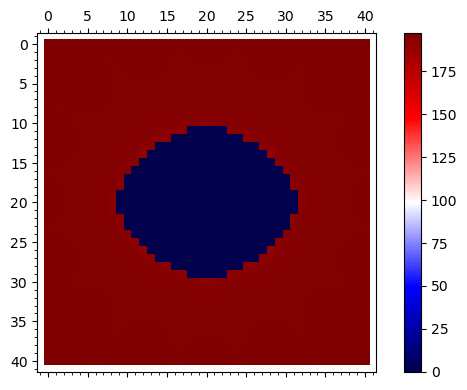

Overall time: 24.64 seconds!
Amount of multiplications: 67298
Amount of aditions: 67298


In [24]:
# reset analytics
Analytics.multiplications = 0
Analytics.additions = 0

t2 = time.time()

print('Initialize setup...')

t0 = time.time()

# Initialize setup parameters
setup = initialize_julia_sets(-1+0.2*i, 'x^2+c', -2, 2, -2, 2, 10)
func(x, c) = setup['formula']

t1 = time.time()

print('Initialize done: ' + str(round(t1 - t0, 2)) + ' seconds!')

print('Initialize Matrix...')

t0 = time.time()

# Initialize matrix
matrix = initialize_matrix(setup)

t1 = time.time()

print('Initialize done: ' + str(round(t1 - t0, 2)) + ' seconds!')

print('Calculating....')

t0 = time.time()

# Change matrix values
matrix = change_matrix(func, matrix, setup)

t1 = time.time()

print('Calculation done: ' + str(round(t1 - t0, 2)) + ' seconds!')
print_matrix(matrix)

t3 = time.time()

print('Overall time: ' + str(round(t3 - t2, 2)) + ' seconds!')
print('Amount of multiplications: ' + str(Analytics.multiplications))
print('Amount of aditions: ' + str(Analytics.additions))

### Weiter Implementierungen

Für die Python und Python-Numba Implementierung sehen Sie bitte im zweiten Notebook - Julia Mengen Python Kernel - nach.

## Auswertung des Algorithmen
---

Folgende Parameter wurden festgelegt:

1. $c = -0.7423 + 0.105i$
2. Bildgröße 4x4: (-2 bis 2 auf x- und y-Achse) 
3. Iterationsvorschrift: $z_{n+1} = z_n^2+c$ 
4. Obere bzw. untere Wertegrenze: -100 bzw. 100
5. Anzahl der maximalen Durchgänge: 200

Um Vergleichbarkeit herzustellen, sind hier die wichtigsten Spezifikationen des Computers aufgelistet, auf dem die Berechnungen durchgeführt wurden:
- AMD 4700S 8-Core Processor Desktop Kit   3.60 GHz
- 16.0 GB RAM
- NVIDIA GeForce GTX 1650

| Scaling | Algorithmus | Multiplikationen | Additionen | Zeit in Sekunden |
|---------|-------------|------------------|------------|------|
|10|Sage Math|40.365|40.365|23.84s|
|10|Python|40.365|40.365|0.11s|
|10|Python mit Numba|40.365|40.365|0.06s|
|20|Sage Math|167.537|167.537|87.35s|
|20|Python|167.537|167.537|0.26s|
|20|Python mit Numba|167.537|167.537|0.07s|
|30|Sage Math|375.253|375.253|243.12s $\approx$ 4min|
|30|Python|375.253|375.253|0.5s|
|30|Python mit Numba|375.253|375.253|0.07s|
|40|Sage Math|666.251|666.251|510.28s $\approx$ 8.30min|
|40|Python|666.251|666.251|0.85s|
|40|Python mit Numba|666.251|666.251|0.08s|
|50|Sage Math|1.045.347|1.045.347|789.21s $\approx$ 13min|
|50|Python|1.045.347|1.045.347|1.28s|
|50|Python mit Numba|1.045.347|1.045.347|0.07s|
|100|Sage Math|4.179.391|4.179.391|3403.15 $\approx$ 56min|
|100|Python|4.179.391|4.179.391|5.0s|
|100|Python mit Numba|4.179.391|4.179.391|0.11s|
|1.000|Sage Math|417.912.820|417.912.820|> 8h|
|1.000|Python|417.912.820|417.912.820|499.57s $\approx$ 8min|
|1.000|Python mit Numba|417.912.820|417.912.820|6.24s|
|2.000|Sage Math|---|---|---|
|2.000|Python|1.671.607.187|1.671.607.187|2024.71s $\approx$ 33min|
|2.000|Python mit Numba|1.671.607.187|1.671.607.187|42.22s|


Wie die Tabelle zeigt, gibt es doch große Unterschiede: 

SageMath belegt mit Abstand den letzten Platz. Mit dieser "Programmiersprache" und dem gewählten Algorithmus konnten die letzten beiden Tests mit einem Scaling von 1.000 und 2.000 nicht ausgeführt werden, da hier die Ausführung nach über 8 Stunden abgebrochen wurde. Für ein Scaling von 2.000 kann man wieder mit einem Faktor 2 in der Ausführungszeit rechnen, also wäre man hier schon bei ca. 16 Stunden Ausführungszeit.

Bei der Implementierung in Python ging dies deutlich schneller, wobei man ab einem Scaling von 1.000 auch längere Rechenzeiten benötigt. Aber im Vergleich zu SageMath sind diese noch akzeptabel.

Wenn man die Python-Implementierung noch mit dem Plug-In Numba versieht und somit eine Just-In-Time-Compilierung nach C, C++ oder Fortan erzwingt, dann hat man zumindest in hohen Scalingbereichen bessere Ausführzeiten.

#### Grafische Darstellung der Tabelle

In folgendem Plot werden die Daten der obigen Tabelle als Plot dargestellt.

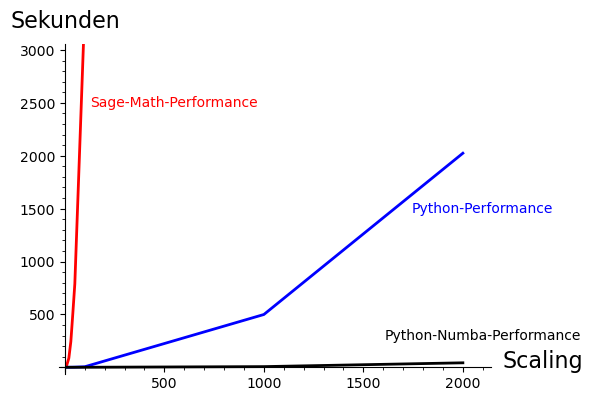

In [59]:
sage_math = [(10, 23), (20, 87), (30, 243), (40, 510), (50, 789), (100, 3403), (1000, 28800)]
python = [(10, 0.1), (20, 0.26), (30, 0.5), (40, 0.85), (50, 1.28), (100, 5), (1000, 499), (2000, 2024)]
numba = [(10, 0.06), (20, 0.07), (30, 0.07), (40, 0.08), (50, 0.07), (100, 0.11), (1000, 6.24), (2000, 42.22)]

g = Graphics()

g += list_plot(sage_math, plotjoined=True, color='red', ymax = 3000, thickness=2, axes_labels=["Scaling", "Sekunden"]) + text("Sage-Math-Performance", (550, 2500), color='red')
g += list_plot(python, plotjoined=True, color='blue', ymax = 3000, thickness=2) + text("Python-Performance", (2100, 1500), color='blue')
g += list_plot(numba, plotjoined=True, color='black', ymax = 3000, thickness=2) + text("Python-Numba-Performance", (2100, 300), color='black')

g.show()

## Fazit
---

Diese Algorithmen zeigen einen klaren Unterschied zwischen verschiedenen Programmiersprachen im Punkt Rechenperformance. SageMath eignet sich zwar für die Visualisierung und Berechnung kleinerer Mengen, da es viele verschiedene mathematische Funktionen schon direkt zur Verfügung stellt. Allerdings ist SageMath weniger für Berechnungnen mit mehrere Millionen Schritten geeignet.

An diesem Punkt kommen vor allem die Programmiersprachen, die für Datenanalyse und performante Berechnungen gemacht sind, ins Spiel. Allein, was die Performance der Berechnungen angeht, schneiden C, C++ und Fortan am Besten ab.
Da aber deren Benutzerfreundlichkeit im Vergleich zu Python deutlich schlechter ist, ist das Plug-In Numba für Python eine sehr gute Unterstützung. Aufgrund der guten Rechenperformance von C, C++ und Fortan schneidet auch die Python Implementierung mit diesem Plug-In am Besten ab und eignet sich somit sehr gut für große Berechnungen, wie z.B. hoch skalierte Julia Mengen. 

Allerdings ist hier zu beachten, dass die Ausführzeiten auch stark mit der Konfiguration des Computers, bzw. der aktuellen Auslastung des Betriebssystems zusammenhängt. Ebenso wurden mögliche Optimierungen oder Seiteneffekte des Compiles nicht mit einbezogen.

## Übungsaufgaben
---

1. **Erstellen Sie die initiale Matrix mit den komplexen Zahlen der markierten Punkte.** 
    
    *Tipp: Eintrag $a_{11} = -2 + 2i$ und $a_{12} = -1 + 2i$ und $a_{21} = -2 + 1i$.*

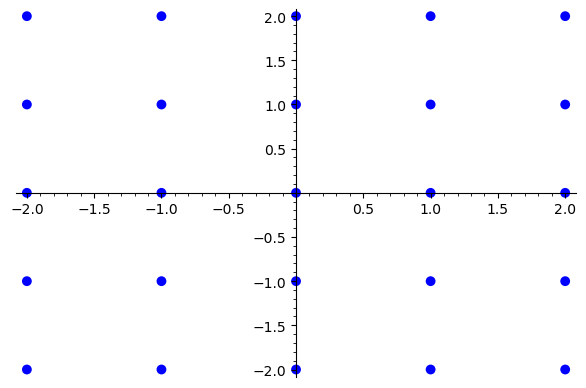

In [10]:
list = [(2,2), (2,1), (2,0), (2,-1), (2,-2), (1,2), (1,1), (1,0), (1,-1), (1,-2), (0,2), (0,1), (0,0), (0,-1), (0,-2), (-1,2), (-1,1), (-1,0), (-1,-1), (-1,-2), (-2,2), (-2,1), (-2,0), (-2,-1), (-2,-2)]

points(list, size = 50)

2. **Berechnen Sie für gegebene Startwerte ($z_0$) den Wert, der in der Folge ($z_{n+1} = z_n^2 + c$) mit $c = 1 + 0i$ auf sie folgt ($z_1$).**
    1. $z_0 = 1+i$
    2. $z_0 = 0.5+0.5i$
    3. $z_0 = i$
    4. $z_0 = 0$

3. **Berechenen Sie für $z_0 = 1 + -i$ den Wert von $z_5$ mit $z_{n+1} = z_n^2 + c$ und $c = 1$ und entscheiden Sie anhand Ihrer Ergebnisse, ob die Folge beschränkt ist oder nicht.**

4. **Was ist das besondere an folgender Julia-Menge mit $c = 0$?**

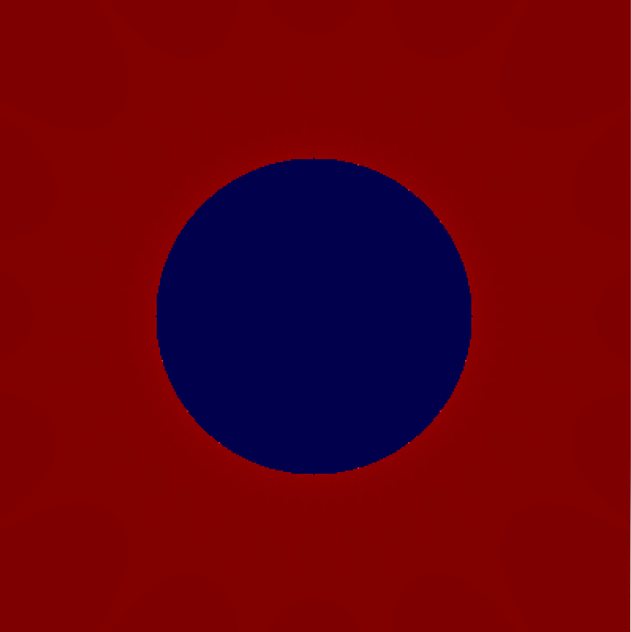

## Lösungen
---

1. **Erstellen Sie die initiale Matrix mit den komplexen Zahlen der markierten Punkte.** 

In [21]:
setup = initialize_julia_sets(0, 'x^2+c', -2, 2, -2, 2, 1)
matrix = initialize_matrix(setup)
matrix

[-2.0 + 2.0*I -1.0 + 2.0*I        2.0*I  1.0 + 2.0*I  2.0 + 2.0*I]
[-2.0 + 1.0*I -1.0 + 1.0*I        1.0*I  1.0 + 1.0*I  2.0 + 1.0*I]
[        -2.0         -1.0          0.0          1.0          2.0]
[-2.0 - 1.0*I -1.0 - 1.0*I       -1.0*I  1.0 - 1.0*I  2.0 - 1.0*I]
[-2.0 - 2.0*I -1.0 - 2.0*I       -2.0*I  1.0 - 2.0*I  2.0 - 2.0*I]

2. **Berechnen Sie für gegebene Startwerte ($z_0$) den Wert, der in der Folge ($z_{n+1} = z_n^2 + c$) mit $c = 1 + 0i$ auf sie folgt ($z_1$).**

$z_0 = 1+i$

In [12]:
(1+i)^2 + 1

2*I + 1

$z_0 = 0.5+0.5i$

In [13]:
(0.5+0.5 * i)^2 + 1

1.00000000000000 + 0.500000000000000*I

$z_0 = i$

In [14]:
(i)^2 + 1

0

$z_0 = 0$

In [15]:
0^2 + 1

1

3. **Berechenen Sie für $z_0 = 1 + -i$ den Wert von $z_5$ mit $z_{n+1} = z_n^2 + c$ und $c = 1$ und entscheiden Sie anhand Ihrer Ergebnisse, ob die Folge beschränkt ist oder nicht.**

In [16]:
z = 1 + -1*i
c = 1

for i in range(5):
    z = z^2 + c
    print('z_' + str(i+1) + ' = ' + str(z))

z_1 = -2*I + 1
z_2 = -4*I - 2
z_3 = 16*I - 11
z_4 = -352*I - 134
z_5 = 94336*I - 105947


Folge ist nicht beschränkt. Konvergiert gegen unendlich.

4. **Was ist das besondere an folgender Julia-Menge mit $c = 0$?**

Die Julia-Menge für die komplexe Konstante gleich Null entspricht genau dem Einheitskreis. Alle komplexen Punkte innerhalb des Einheitskreises konvergieren gegen unendlich, während alle Punkte außerhalb des Einheitskreises nicht gegen unendlich konvergieren.